## **Project Name -**

Project Type - Classification

Contribution - Individual --- **VANTAKULA GOWTHAM NAIDU**

### **GitHub Link -**

https://github.com/GOWTHAMVANTAKULA/Water-Quality-Classification-ML

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# warnings

import warnings
warnings.filterwarnings('ignore')

In [74]:
# data = pd.read_csv('/content/drive/MyDrive/Data_Files/Water Quality Classification.csv', encoding='latin1')
data = pd.read_csv('/content/NWMP_August2025_MPCB_0.csv', encoding='latin1')
pd.set_option('display.max_columns',None) # display all columns

In [69]:
# DATA OVERVIEW
data.shape

(222, 54)

In [ ]:
# TOTAL NULL VALUES
data.isnull().sum()

,0
STN Code,0
Sampling Date,0
Month,0
Sampling Time,0
Stn Name,0
Type Water Body,0
Name Of Water Body,22
River Basin,24
District,0
State Name,0


In [75]:
data = data.drop([' Use of Water in Down Stream','Remark','STN Code','Month','State Name'],axis = 1)


### **DATA CLEANING**

In [76]:
# STRIP ALL THE COLUMN NAMES
data.columns = data.columns.str.strip()
# List of categorical columns to strip
cols_to_strip = [
    'Type Water Body','Name Of Water Body','River Basin','District',
    'Mon Agency','Frequency','Major Polluting Sources','Use Based Class',
    'Visibility Effluent Discharge','Weather','Approx Depth','Human Activities',
    'Floating Matter','Color','Odor'
]

# Strip whitespace from values in these columns
for col in cols_to_strip:
    data[col] = data[col].astype(str).str.strip()


In [77]:
# clean all numeric values
def clean_numeric(n):
    if pd.isna(n):
        return np.nan

    n = str(n).strip()

    if n.upper() == 'ND':
        return np.nan

    if '(BDL)' in n:
        n = n.split('(')[0]  # get the number before (BDL)

    try:
        return float(n)  # always convert to float
    except:
        return np.nan


numeric_cols = [ 'Temperature','Dissolved O2','pH','Conductivity','BOD','Nitrate N', 'Fecal Coliform','Total Coliform','Fecal Streptococci','Turbidity', 'Phenophelene Alkanity','Total Alkalinity','Chlorides','COD', 'Total Kjeldahl N','Amonia N','Hardness CaCo3','Calcium CaCo3', 'Magnesium CaCo3','Sulphate','Sodium','Total Dissolved Solids', 'Total Fixed Solids','Total Suspended Solids','Phosphate','Boron', 'Potassium','Flouride' ]
# apply on data set
for i in numeric_cols:
  data[i] = data[i].apply(clean_numeric)

In [78]:
data['Sampling Date'] = pd.to_datetime(data['Sampling Date'],format = "%m-%d-%Y",errors= 'coerce' )
data['Sampling Time'] = data['Sampling Time'].apply(lambda i : int(str(i).split(':')[0]))

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sampling Date                  222 non-null    datetime64[ns]
 1   Sampling Time                  222 non-null    int64         
 2   Stn Name                       222 non-null    object        
 3   Type Water Body                222 non-null    object        
 4   Name Of Water Body             222 non-null    object        
 5   River Basin                    222 non-null    object        
 6   District                       222 non-null    object        
 7   Mon Agency                     222 non-null    object        
 8   Frequency                      222 non-null    object        
 9   Major Polluting Sources        222 non-null    object        
 10  Use Based Class                222 non-null    object        
 11  Visibility Effluent

## **EXPLORATORY DATA ANALYSIS**

### **1. WATER_CLASS DISTRIBUTION**

In [80]:
# WATER CLASSES
print(data['Use Based Class'].unique())

['A (Drinking Water source without conventional treatment but after disinfection)'
 'E (Irrigation, industrial cooling and controlled waste)'
 'C (Drinking water source)' 'No Information'
 'B (Outdoor bathing(Organized))' 'nan']


In [81]:
valid = ['A','B','C','E']
data['Use Based Class']  =  data['Use Based Class'].apply(lambda i : str(i).split(' ')[0])
data['Use Based Class'] = data['Use Based Class'].apply(lambda i : i if i in valid else np.nan)

  Use Based Class  count
0               A    141
1               E     19
2               C      6
3               B      5


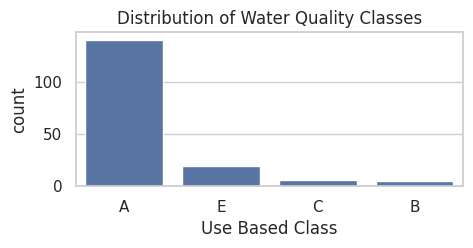

In [82]:
# Countplot including NaN (missing values)
print(data['Use Based Class'].value_counts().reset_index())
plt.figure(figsize=(5,2))
sns.countplot(x='Use Based Class', data=data)
plt.title("Distribution of Water Quality Classes")
plt.xticks(rotation=0)
plt.show()

* Most water samples (82%) fall under Class A, safe for drinking after simple disinfection.

* A smaller share (11%) is Class E, suitable only for irrigation and industrial cooling.

* Very few samples are Class C (3.5%) and Class B (3%), requiring treatment or fit for bathing.

* Overall, the dataset shows strong water quality, with limited pollution hotspots needing attention.

### **2. Water Quality Analysis by Use-Based Class**

In [83]:
# remove null values
data['Total Coliform'] = data['Total Coliform'].replace('nan', np.nan)
data['Total Coliform'] = pd.to_numeric(data['Total Coliform'], errors='coerce')


In [84]:
# total summary by desired values and presented values

Total_Coliform = data.groupby('Use Based Class')['Total Coliform'].mean().reset_index()
Total_Coliform.columns = ['water_calss','Avg_Coliform']

Avg_BOD_DO = data.groupby('Use Based Class')[['BOD','Dissolved O2']].mean().reset_index()

summary = Avg_BOD_DO.merge(Total_Coliform,left_on = 'Use Based Class',right_on='water_calss',how = 'inner')
summary = summary.drop(columns = 'water_calss')
summary

,Use Based Class,BOD,Dissolved O2,Avg_Coliform
0,A,9.731206,5.529078,382.182979
1,B,10.600000,6.140000,276.000000
2,C,5.500000,5.983333,404.000000
3,E,7.352632,5.263158,459.710526


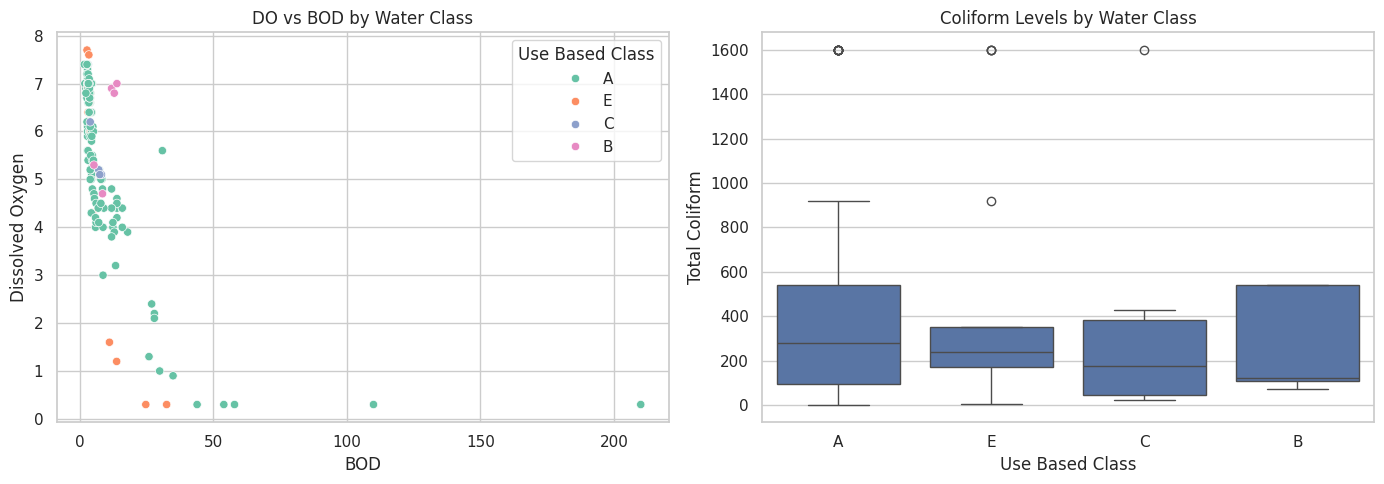

In [85]:
#PLOT
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1: DO vs BOD scatter plot
sns.scatterplot(x='BOD',y='Dissolved O2',hue='Use Based Class',data=data,palette='Set2',ax=axes[0])
axes[0].set_title("DO vs BOD by Water Class")
axes[0].set_xlabel("BOD")
axes[0].set_ylabel("Dissolved Oxygen")

# Subplot 2: Total Coliform boxplot
sns.boxplot(x='Use Based Class',y='Total Coliform',data=data,ax=axes[1])
axes[1].set_title("Coliform Levels by Water Class")
axes[1].set_xlabel("Use Based Class")
axes[1].set_ylabel("Total Coliform")

plt.tight_layout()
plt.show()




| Parameter                   | Limit                                               | Observed (from plots)                                       | Class Pattern                          | Reality Check                                                                                      | Action                                           |
| --------------------------- | --------------------------------------------------- | ----------------------------------------------------------- | -------------------------------------- | -------------------------------------------------------------------------------------------------- | ------------------------------------------------ |
| Total Coliform (MPN/100 mL) | A: <50*  <br> B: ≤500 <br> C: ≤5000 <br> E: Relaxed | A: 280 (outliers ~1600) <br> B: 120 <br> C: 175 <br> E: 240 | B < C < E < A                          | Intended-use classification <br> Measured before treatment <br> Outliers indicate sewage intrusion | Disinfection (UV/Chlorine) <br> Sewage diversion |
| BOD (mg/L)                  | <3 (clean)                                          | ~1–200                                                      | A/B low <br> C moderate <br> E extreme | High organic pollution in Class E                                                                  | Effluent treatment <br> Organic waste control    |
| DO (mg/L)                   | >5 healthy <br> <3 critical                         | ~0.5–8                                                      | A/B high <br> C moderate <br> E low    | Oxygen consumed by microbial activity                                                              | Aeration <br> Discharge reduction                |
| DO–BOD Relationship         | Inverse expected                                    | Strong negative trend                                       | Clear separation by class              | Matches environmental pollution theory                                                             | Source control <br> River restoration            |


### **3. Water Body Quality Assessment: Suitability and Treatment Needs**

In [86]:
# clean the missing values in the river basin
data['River Basin'] = data['River Basin'].replace('nan',np.nan)

In [87]:
# Define thresholds for all parameters
def check_violations(row):
    violations = []
    if not (6.5 <= row['pH'] <= 8.5):
        violations.append("pH")
    if row['Dissolved O2'] <= 5:
        violations.append("DO")
    if row['BOD'] >= 3:
        violations.append("BOD")
    if row['COD'] >= 10:
        violations.append("COD")
    if row['Total Coliform'] >= 50:
        violations.append("Total Coliform")
    if row['Fecal Coliform'] >= 10:
        violations.append("Fecal Coliform")
    if row['Nitrate N'] >= 10:
        violations.append("Nitrate")
    if row['Total Dissolved Solids'] >= 500:
        violations.append("TDS")
    if row['Conductivity'] >= 1000:
        violations.append("Conductivity")
    if row['Turbidity'] >= 5:
        violations.append("Turbidity")
    if not (10 <= row['Temperature'] <= 30):
        violations.append("Temperature")
    return violations

basin_avg = data.groupby("River Basin")[["Dissolved O2","BOD","COD","Total Coliform","Fecal Coliform","Nitrate N","Total Dissolved Solids","Conductivity","Turbidity","Temperature","pH"]].mean().reset_index()

basin_avg["Violations"] = basin_avg.apply(check_violations, axis=1)
basin_avg["Violation Count"] = basin_avg["Violations"].apply(len)

basin_0 = basin_avg[basin_avg["Violation Count"] == 0]["River Basin"].tolist()
basin_1_2 = basin_avg[basin_avg["Violation Count"].between(1,2)]["River Basin"].tolist()
basin_3_5 = basin_avg[basin_avg["Violation Count"].between(3,5)]["River Basin"].tolist()
basin_5plus = basin_avg[basin_avg["Violation Count"] > 5]["River Basin"].tolist()


print("✅ Sector 0 (No violations - Fully Suitable):")
print(" - " + ", ".join(basin_0) if basin_0 else " - None")
print()

print("⚠️ Sector 1–2 (Minor Treatment Needed):")
print(" - " + ", ".join(basin_1_2) if basin_1_2 else " - None")
print()

print("⚠️ Sector 3–5 (Moderate Treatment Needed):")
print(" - " + ", ".join(basin_3_5) if basin_3_5 else " - None")
print()

print("❌ Sector 5+ (Severe Treatment Needed):")
print(" - " + ", ".join(basin_5plus) if basin_5plus else " - None")
print()


✅ Sector 0 (No violations - Fully Suitable):
 - None

⚠️ Sector 1–2 (Minor Treatment Needed):
 - Amravati, Bori, Burai, Girrna, Godavari, Hiwara, Karambavane, Manjara, Mor, Muchkundi, Panchganga, Pehlar, Pimpal Paneri, Savitri, Titur, Vashisthi

⚠️ Sector 3–5 (Moderate Treatment Needed):
 - Bhatsa, Bhima, Bindusara, Chandrabhaga, Erai, Ghod, Indrayani, Kalu, Kan, Kanhan, Koyna, Krishna, Kundalika, Mithi River, Morna, Mula, Mula Mutha, Nira, Panvel, Patalganga, Penganga, Rangavali, Sarwali, Surya, Tansa, Urmodi, Vaitarna, Velu, Venna, Wainganga, Wardha, Wena

❌ Sector 5+ (Severe Treatment Needed):
 - Arnala, BPT Navapur, Bassein, Bhagwati Bundar, Bhayander, Chikhali Nalla, Churni Road, Colour Chem, Dahanu, Dandi, Darna, Eliphanta Island, Ganptipule, Gate Way of India, Girna, Godavri, Gomai, Haji Ali, Juhu  Beach, Kharekuran Murbe, Mahim Creek, Malabar Hill, Mandvi, Mutha, Narimen Point, Navapur, Panzara, Pawana, Pedhi, Purna, Rabodi, Sandoz, Savta, Shivaji Park, Sina, Tapi, Tarapur MIDC

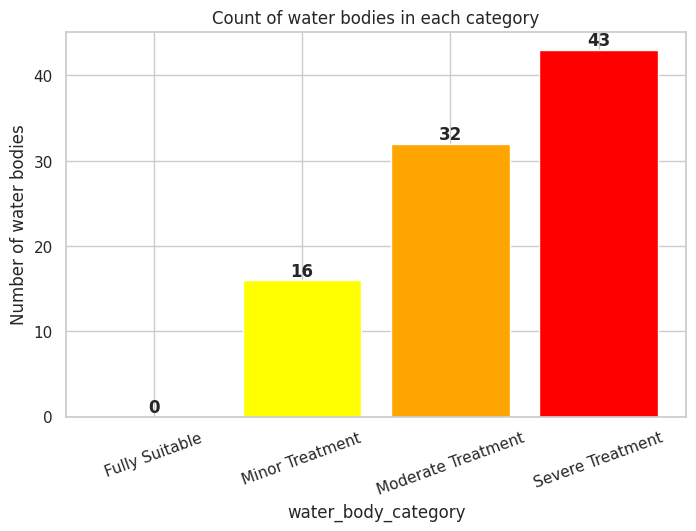

In [88]:
# Count how many basins fall into each sector
sector_counts = {"Fully Suitable": len(basin_0),"Minor Treatment": len(basin_1_2),"Moderate Treatment": len(basin_3_5),"Severe Treatment": len(basin_5plus)}

# Plot count plot (bar chart)
plt.figure(figsize=(8,5))
plt.bar(sector_counts.keys(), sector_counts.values(),
        color=["green","yellow","orange","red"])

plt.xlabel("water_body_category")
plt.ylabel("Number of water bodies")
plt.title("Count of water bodies in each category")
plt.xticks(rotation=20)

# Add labels on top of bars
for i, v in enumerate(sector_counts.values()):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.show()


| Sector | Violation Range | Rivers | Action to be Taken |
|--------|------------------|--------|--------------------|
| ✅ Sector 0 | No violations – Fully Suitable | None | Only basic disinfection (chlorination / UV) |
| ⚠️ Sector 1–2 | Minor Treatment Needed | • Amravati, Bori, Burai, Girrna, Godavari, Hiwara, Karambavane, Manjara, Mor<br>• Muchkundi, Panchganga, Pehlar, Pimpal Paneri, Savitri, Titur, Vashisthi | Aeration, microbial filtration, minor chemical correction |
| ⚠️ Sector 3–5 | Moderate Treatment Needed | • Bhatsa, Bhima, Bindusara, Chandrabhaga, Erai, Ghod, Indrayani, Kalu, Kan<br>• Kanhan, Koyna, Krishna, Kundalika, Mithi River, Morna, Mula, Mula Mutha, Nira<br>• Panvel, Patalganga, Penganga, Rangavali, Sarwali, Surya, Tansa, Urmodi, Vaitarna<br>• Velu, Venna, Wainganga, Wardha, Wena | Aeration + biological treatment + disinfection + pH correction |
| ❌ Sector 5+ | Severe Treatment Needed | • Arnala, BPT Navapur, Bassein, Bhagwati Bundar, Bhayander, Chikhali Nalla, Churni Road, Colour Chem, Dahanu<br>• Dandi, Darna, Eliphanta Island, Ganptipule, Gate Way of India, Girna, Godavri, Gomai, Haji Ali<br>• Juhu Beach, Kharekuran Murbe, Mahim Creek, Malabar Hill, Mandvi, Mutha, Narimen Point, Navapur, Panzara<br>• Pawana, Pedhi, Purna, Rabodi, Sandoz, Savta, Shivaji Park, Sina, Tapi<br>• Tarapur MIDC Nalla, Thane, Ulhas, Uttan, Versova Beach, Waghur, Worli Seaface | Full remediation including advanced treatment for COD/TDS, strict monitoring |


### **4. District‑wise Water Quality Treatment Summary**

In [89]:
# Aggregate by District
district_avg = data.groupby("District")[["Dissolved O2","BOD","COD","Total Coliform","Fecal Coliform",
    "Nitrate N","Total Dissolved Solids","Conductivity","Turbidity","Temperature","pH"]].mean().reset_index()

# Apply violation check
district_avg["Violations"] = district_avg.apply(check_violations, axis=1)
district_avg["Violation Count"] = district_avg["Violations"].apply(len)

# Categorize into 4 sectors
sector_0 = district_avg[district_avg["Violation Count"] == 0]["District"].tolist()
sector_1_2 = district_avg[district_avg["Violation Count"].between(1,2)]["District"].tolist()
sector_3_5 = district_avg[district_avg["Violation Count"].between(3,5)]["District"].tolist()
sector_5plus = district_avg[district_avg["Violation Count"] > 5]["District"].tolist()

# Print crisp bullet-point summary
print("✅ Sector 0 (No violations - Fully Suitable):")
print(" - "  +  ", ".join(sector_0) if sector_0 else " - None")
print()

print("⚠️ Sector 1–2 (Minor Treatment Needed):")
print(" - "  +  ", ".join(sector_1_2) if sector_1_2 else " - None")
print()

print("⚠️ Sector 3–5 (Moderate Treatment Needed):")
print(" - "  +  ", ".join(sector_3_5) if sector_3_5 else " - None")
print()

print("❌ Sector 5+ (Severe Treatment Needed):")
print(" - "   +   ", ".join(sector_5plus) if sector_5plus else " - None")
print()


✅ Sector 0 (No violations - Fully Suitable):
 - None

⚠️ Sector 1–2 (Minor Treatment Needed):
 - Ch. Sambhaji Nagar, Kolhapur, Latur, Sangli

⚠️ Sector 3–5 (Moderate Treatment Needed):
 - Amravati, Beed, Bhandara, Chandrapur, Jalna, Nagpur, Nanded, Parbhani, Pune, Raigad, Satara

❌ Sector 5+ (Severe Treatment Needed):
 - Akola, Dhule, Jalgaon, Mumbai, Nashik, Ratnagiri, Solapur, Thane



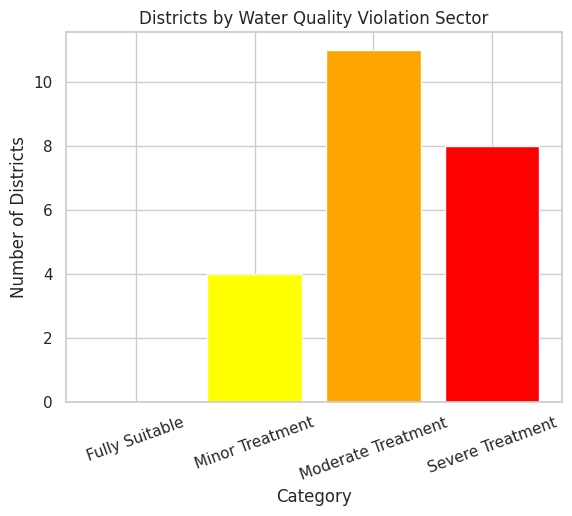

In [90]:
# Count districts in each sector
sector_counts = {"Fully Suitable": len(sector_0),"Minor Treatment": len(sector_1_2),
    "Moderate Treatment": len(sector_3_5),"Severe Treatment": len(sector_5plus)}

# Plot bar chart
plt.bar(sector_counts.keys(), sector_counts.values(), color=["green","yellow","orange","red"])
plt.xlabel("Category")
plt.ylabel("Number of Districts")
plt.title("Districts by Water Quality Violation Sector")
plt.xticks(rotation=20)
plt.show()


| Sector | Violation Range | Treatment Level | Districts | Recommended Action |
|--------|------------------|-----------------|-----------|--------------------|
| ✅ Sector 0 | 0 (No violations) | No Treatment Needed | None | Only basic disinfection (chlorination / UV) |
| ⚠️ Sector 1–2 | Minor violations | Minor Treatment Needed | Ch. Sambhaji Nagar, Kolhapur, Latur, Sangli | Aeration, microbial filtration, minor chemical correction |
| ⚠️ Sector 3–5 | Moderate violations | Moderate Treatment Needed | Amravati, Beed, Bhandara, Chandrapur, Jalna, Nagpur, Nanded, Parbhani, Pune, Raigad, Satara | Aeration + biological treatment + disinfection + pH correction |
| ❌ Sector 5+ | Severe violations | Severe Treatment Needed | Akola, Dhule, Jalgaon, Mumbai, Nashik, Ratnagiri, Solapur, Thane | Full remediation including advanced treatment for COD/TDS, strict monitoring |


###  **5. Assessment of District-level Water Body Distribution**

              District  Water Body Count
22               Thane                26
11              Mumbai                12
16                Pune                 9
7              Jalgaon                 7
6                Dhule                 7
18           Ratnagiri                 7
17              Raigad                 5
20              Satara                 5
21             Solapur                 5
14              Nashik                 5
12              Nagpur                 4
0                Akola                 4
5           Chandrapur                 4
9             Kolhapur                 3
1             Amravati                 3
15            Parbhani                 2
13              Nanded                 2
3             Bhandara                 2
10               Latur                 2
19              Sangli                 2
2                 Beed                 1
4   Ch. Sambhaji Nagar                 1
8                Jalna                 1



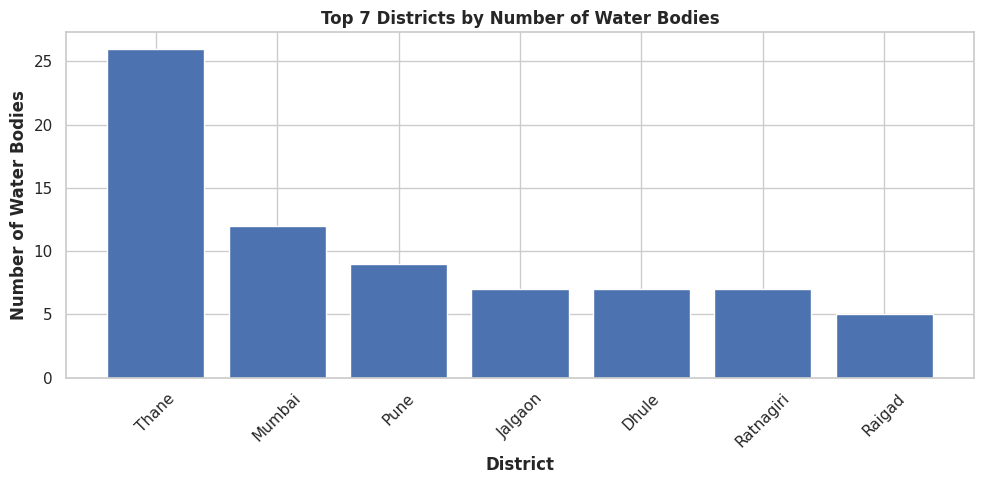

In [91]:
# Count distinct water bodies per district
district_wise_waterbodies = data.groupby("District")["Name Of Water Body"].nunique().reset_index(name="Water Body Count").sort_values('Water Body Count',ascending= False)
top_districts = district_wise_waterbodies.head(7)
print(district_wise_waterbodies)
print()

#plot
plt.figure(figsize=(10, 5))
plt.bar(top_districts["District"], top_districts["Water Body Count"])
plt.xlabel("District", fontweight='bold')
plt.ylabel("Number of Water Bodies", fontweight='bold')
plt.title("Top 7 Districts by Number of Water Bodies", fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 **District-wise Water Body Availability Report**

The analysis of district-wise water body counts highlights significant variation in surface water availability across regions, reflecting differences in geography, climate, and water resource management.

- **High water availability districts**, such as **Thane (26 water bodies), Mumbai (12), and Pune (9)**, indicate a strong presence of rivers, lakes, and reservoirs. These districts have comparatively better access to surface water resources, which can effectively support domestic, industrial, and agricultural needs if pollution control and sustainable usage practices are maintained.

- **Moderate water availability districts**, including **Jalgaon, Dhule, and Ratnagiri (7 each)**, along with **Raigad, Satara, Solapur, Nashik (5 each)** and **Nagpur, Akola, Chandrapur (4 each)**, possess adequate water resources but may be vulnerable to seasonal fluctuations. These regions require efficient water storage systems, regulated extraction, and integrated watershed management to ensure long-term water security.

- **Low water availability districts**, such as **Kolhapur and Amravati (3 each)**, **Parbhani, Nanded, Bhandara, Latur, and Sangli (2 each)**, and **Beed, Ch. Sambhaji Nagar, and Jalna (1 each)**, are more prone to water stress. These districts demand focused interventions, including rainwater harvesting, groundwater recharge, water conservation practices, and improved water-use efficiency.

Overall, the data reveals an **uneven spatial distribution of water bodies across districts**. However, through **cautious water usage, sustainable management practices, and continuous monitoring**, water scarcity issues can be mitigated, ensuring equitable and long-term water resource sustainability.


### **6. COD Distribution by Pollution Source**

In [92]:
# data cleaning
data['Major Polluting Sources'] = data['Major Polluting Sources'].replace(['nan', '00-01-1900'],np.nan)

<Axes: xlabel='Major Polluting Sources', ylabel='COD'>

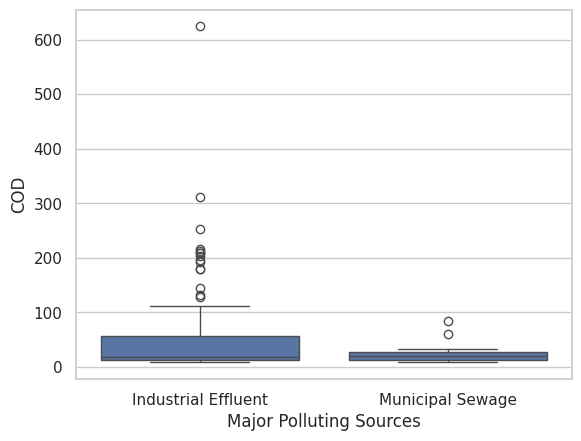

In [93]:
sns.boxplot(x="Major Polluting Sources", y="COD", data=data)

*  COD was chosen because it directly measures the amount of oxygen required to oxidize organic and chemical pollutants, making it a strong indicator of overall pollution load, especially from industrial and sewage sources.

* COD reacts quickly to industrial discharge, unlike BOD which measures only biodegradable matter; this makes COD ideal for identifying sudden pollution spikes and extreme contamination events.

* A box plot was used because COD values are typically skewed and contain outliers, and the box plot effectively summarizes the distribution, spread, median, and extreme values in a single visual.

* The box plot enables comparison across pollution sources, helping identify which sources show consistent pollution versus occasional severe spikes, something averages alone cannot capture.

* From the box plot, industrial effluents show higher medians and extreme outliers, indicating greater and more irregular pollution impact, while other sources show relatively stable COD levels—guiding pollution control and treatment priority.

###  **7. Geographic Distribution of pH Violations**

In [94]:
# Assuming your dataframe is called df and has columns 'District' and 'pH'
ph_summary = data.groupby('District')['pH'].agg(['mean', 'median', 'min', 'max']).reset_index()

ph_summary['violation'] = ph_summary.apply(lambda i : 'safe' if i['min']>= 6.5 and i['max']<= 8.5 else 'not safe',axis = 1)
print(ph_summary)

              District      mean  median  min  max violation
0                Akola  8.560000    8.50  7.8  9.7  not safe
1             Amravati  8.420000    8.50  8.1  8.5      safe
2                 Beed  8.600000    8.60  8.6  8.6  not safe
3             Bhandara  7.825000    7.90  7.6  7.9      safe
4   Ch. Sambhaji Nagar  8.275000    8.35  7.9  8.5      safe
5           Chandrapur  8.227273    8.40  7.5  8.4      safe
6                Dhule  8.140000    8.30  7.7  8.3      safe
7              Jalgaon  8.625000    8.65  8.5  8.7  not safe
8                Jalna  8.700000    8.70  8.7  8.7  not safe
9             Kolhapur  7.725000    7.70  7.6  7.8      safe
10               Latur  8.400000    8.40  8.3  8.5      safe
11              Mumbai  7.825000    7.85  7.4  8.0      safe
12              Nagpur  8.038462    8.20  7.4  8.6  not safe
13              Nanded  8.466667    8.30  8.1  9.0  not safe
14              Nashik  8.180000    8.10  7.1  9.3  not safe
15            Parbhani  

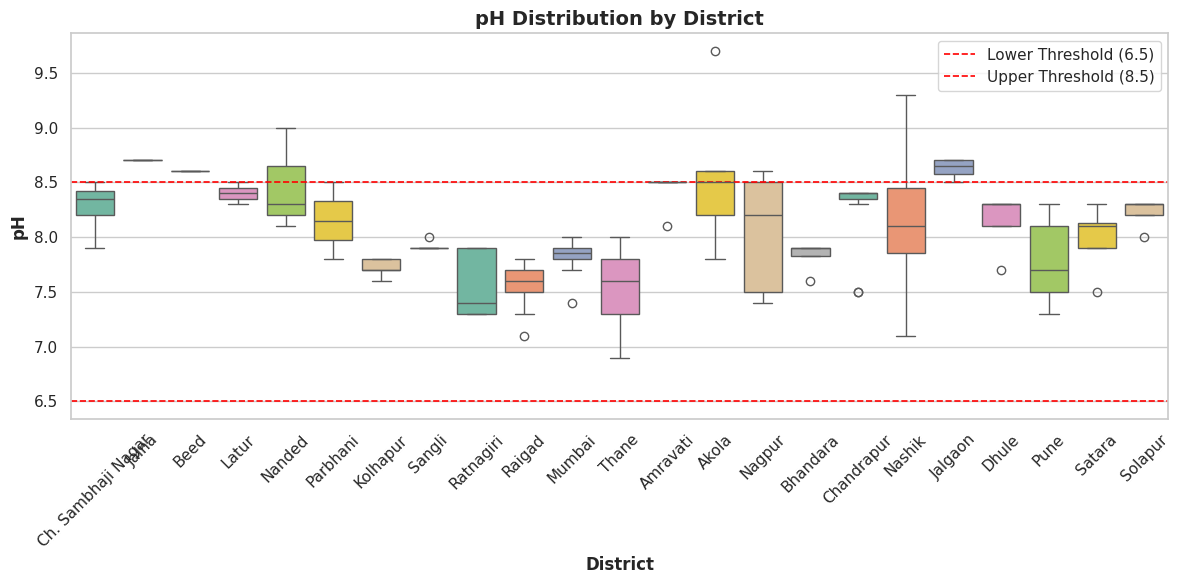

In [95]:
# plot
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x="District", y="pH", data=data, palette="Set2")

# Add threshold lines for safe pH range (6.5–8.5)
plt.axhline(6.5, color="red", linestyle="--", linewidth=1.2, label="Lower Threshold (6.5)")
plt.axhline(8.5, color="red", linestyle="--", linewidth=1.2, label="Upper Threshold (8.5)")

plt.title("pH Distribution by District", fontsize=14, fontweight="bold")
plt.xlabel("District", fontsize=12, fontweight="bold")
plt.ylabel("pH", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


* pH is a key chemical indicator of water quality because it affects solubility of metals, biological activity, and overall suitability for drinking, irrigation, and aquatic ecosystems.

* Districts such as Nagpur, Nashik, Nanded, Akola, Beed, Jalgaon, and Jalna show violations with values exceeding the safe 6.5–8.5 range, meaning they require treatment and closer monitoring.

* Most other districts, including Thane, Ratnagiri, Raigad, Kolhapur, Pune, and Mumbai, remain stable within the safe range, indicating balanced chemistry and lower immediate risk.

* The box plot was chosen because it highlights median, spread, and outliers in one view, making violations and variability across districts visible in a way averages alone cannot.

### **8. Analysis of Water Quality Based on Human Activities**

In [96]:
# remove null values
data['Human Activities'] = data['Human Activities'].replace('nan',np.nan)

In [97]:
# add violations and violation count to a copy data
data_2 = data.copy()
data_2['violations'] = data_2.apply(check_violations,axis = 1)
data_2['violation_count'] = data_2['violations'].apply(len)


In [98]:
# make new df with split human activities
human_activity_df = (
    data_2
        .dropna(subset=['Human Activities'])  # drop all the null values in the column which cannot be splitted
        .assign(Activity=data_2['Human Activities'].str.split(','))  # create new column 'activity' with splitting
        .explode('Activity')  # now explode like one row one word
)

human_activity_df['Activity'] = human_activity_df['Activity'].str.strip()  # strip all words

In [99]:
# total violations each activity made
total_violations = human_activity_df.groupby('Activity')['violation_count'].sum().sort_values(ascending=False).reset_index()
total_violations

,Activity,violation_count
0,Others,714
1,Bathing,270
2,Washing,230
3,Fishing,115
4,Boating,38
5,Tourism Spot,38
6,Gardening,28
7,Idol Emersion Wading,19
8,Cultivation,9


In [100]:
# pH, DO, BOD, COD, TDS, Coliform bacteria are most critical matrics for pure water

In [101]:
# average values for each activity for these critical matrics with frequency
activity_avg_df= human_activity_df.groupby('Activity')[['pH','BOD','COD','Dissolved O2','Total Dissolved Solids','Fecal Coliform']].mean().round(2).reset_index()
activity_avg_df['activity_count'] = human_activity_df['Activity'].value_counts().values
activity_avg_df

,Activity,pH,BOD,COD,Dissolved O2,Total Dissolved Solids,Fecal Coliform,activity_count
0,Bathing,8.08,4.53,27.58,6.22,1942.15,52.42,151
1,Boating,8.24,8.34,128.57,6.23,14575.71,18.09,66
2,Cultivation,8.20,3.33,13.33,7.10,412.67,9.87,61
3,Fishing,8.00,4.47,41.71,6.51,3379.57,48.93,35
4,Gardening,7.68,3.02,11.50,7.05,1622.12,60.88,8
5,Idol Emersion Wading,7.78,10.45,208.00,6.90,25079.50,19.40,7
6,Others,7.79,10.96,48.67,5.21,4347.62,107.55,7
7,Tourism Spot,8.23,7.66,125.14,6.44,14517.43,33.54,4
8,Washing,8.05,4.08,15.87,6.28,448.00,52.72,3


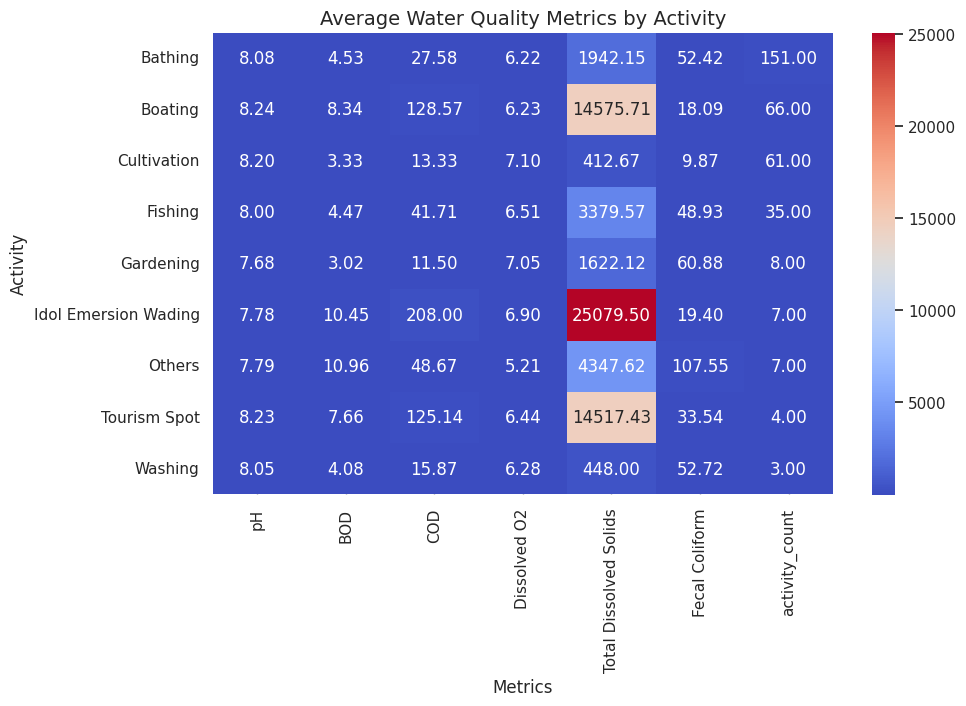

In [102]:
# heat map
plt.figure(figsize=(10,6))
sns.heatmap(activity_avg_df.set_index('Activity'),annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Average Water Quality Metrics by Activity", fontsize=14)
plt.ylabel("Activity")
plt.xlabel("Metrics")
plt.show()


| Activity Group                        | Included Activities         | Exceeding Limits                                 | Reason                                                | Summary                                                                         |
| ------------------------------------- | --------------------------- | ------------------------------------------------ | ----------------------------------------------------- | ------------------------------------------------------------------------------- |
| **Domestic & Contact Activities**     | Bathing, Washing, Gardening | BOD > 3 mg/L, Fecal Coliform > 50                | Direct human contact, detergents, domestic wastewater | High-frequency activities causing sustained organic and microbial contamination |
| **Recreational & Tourism Activities** | Boating, Tourism Spot       | COD > 120 mg/L, TDS > 14,500 mg/L                | Fuel residues, littering, solid waste, human pressure | Lead to severe chemical and dissolved solid pollution                           |
| **Cultural & Religious Activities**   | Idol Emersion Wading        | COD ≈ 208 mg/L, TDS ≈ 25,079 mg/L                | Paints, plaster of Paris, metals from idols           | Short-term but extreme chemical and solid pollution                             |
| **Livelihood Activities**             | Fishing, Cultivation        | BOD > 3 mg/L (moderate), occasional coliform     | Organic inputs, runoff from nearby fields             | Moderate impact but persistent due to regular activity                          |
| **Mixed / Unclassified Activities**   | Others                      | BOD ≈ 11 mg/L, Fecal Coliform ≈ 108, DO ≈ 5 mg/L | Combined domestic, sewage, and unidentified sources   | Highest overall pollution burden and oxygen stress                              |


### **9. Impact of Water Clarity on Pollution Indicators**

In [103]:
# categorize color to colored and clear
data['Color'] = data['Color'].str.strip().replace('nan', np.nan)
data['color_group'] = data['Color'].apply(lambda i : 'clear' if i == 'Clear' else 'Coloured/Turbid' if pd.notna(i) else np.nan)

In [104]:
visible_analysis = data.groupby('color_group')[['BOD','COD','Total Dissolved Solids','Fecal Coliform']].mean().round(2).reset_index()
visible_analysis

,color_group,BOD,COD,Total Dissolved Solids,Fecal Coliform
0,Coloured/Turbid,20.75,85.43,4624.21,74.23
1,clear,7.36,36.71,3506.36,92.24


| Aspect                           | Key Observation                 | Evidence                                                | Interpretation                                                             |
| -------------------------------- | ------------------------------- | ------------------------------------------------------- | -------------------------------------------------------------------------- |
| **Organic & Chemical Pollution** | Higher in coloured/turbid water | BOD: **20.75 vs 7.36**, COD: **85.43 vs 36.71**         | Visual discoloration reflects increased organic and chemical contamination |
| **Dissolved Solids (TDS)**       | Extremely high in all samples   | TDS > **3500 mg/L** in both categories (safe <500)      | Water is chemically unsafe regardless of visual appearance                 |
| **Microbial Contamination**      | Higher even in clear water      | Fecal Coliform: **92.24 (Clear)** vs **74.23 (Turbid)** | Visual clarity does not ensure microbiological safety                      |
| **Overall Reliability of Color** | Partial indicator only          | Color aligns with BOD/COD but not coliform              | Visual indicators must be supported by lab analysis                        |


### **10. Correlation Matrix of River Water Quality Indicators**

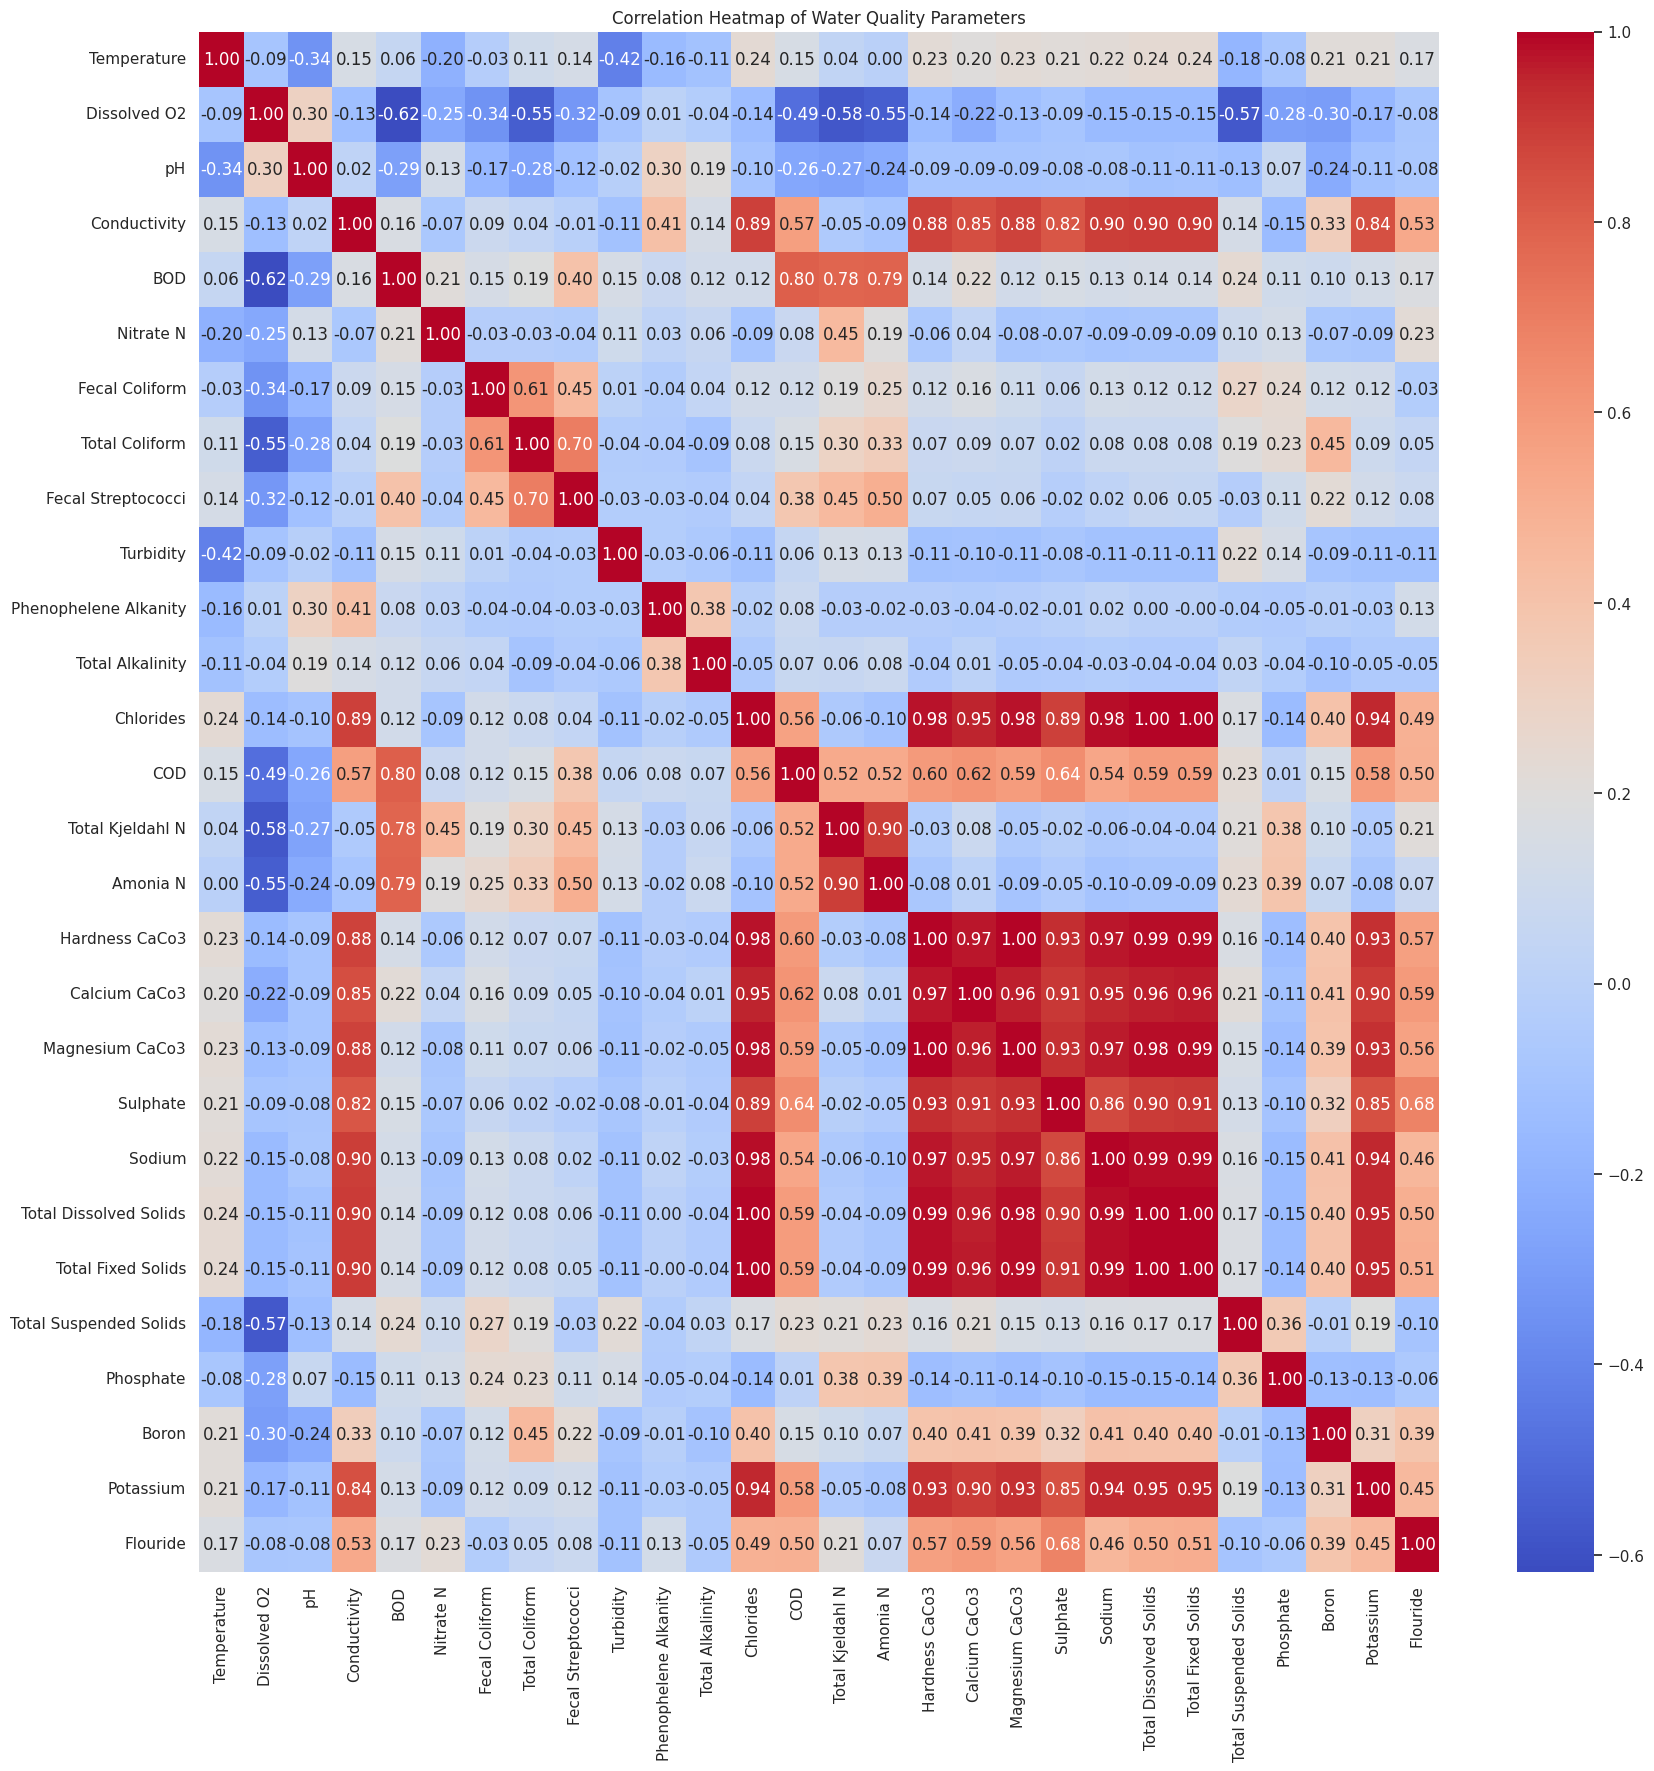

In [105]:
# Drop unwanted columns
data_clean = data.drop(columns=['Sampling Time','Flow'])

# Select only numeric columns
numeric_data = data_clean.select_dtypes(include=['float64','int64'])

# Create correlation matrix
corr = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Water Quality Parameters")
plt.show()


* **Organic Pollution Indicators (BOD & COD):** The heatmap shows strong positive correlation between BOD and COD, both exceeding safe thresholds (<3 mg/L for BOD, <10 mg/L for COD). This suggests significant organic contamination, likely from industrial effluents, with COD consistently higher than BOD as expected.

* **Microbial Contamination (Coliforms):** Fecal Coliform and Total Coliform values are far above safe limits (<10 and <50 MPN/100mL respectively). Their high correlation highlights widespread fecal pollution, posing direct health risks and indicating untreated sewage influence.

* **Mineral Content & Conductivity (TDS, Conductivity, Hardness):** Total Dissolved Solids, Conductivity, and hardness parameters are strongly correlated and well above recommended limits (<500 mg/L for TDS, <1000 μS/cm for conductivity). This points to mineral-rich, hard water conditions, reducing suitability for drinking and industrial use.

* **Physical Parameters (Temperature, Turbidity, DO):** Temperature values are within acceptable ranges (10–30°C), but turbidity exceeds the safe limit (<5 NTU), indicating suspended solids and sediment load. Dissolved Oxygen levels hover near the lower threshold (>5 mg/L), suggesting stress on aquatic life due to organic and microbial pollution.

## **DATA PRE - PROCESSING**

In [106]:
#impute missing values with district mean
data = data.sort_values(by=["Sampling Date", "Sampling Time"])


In [107]:
# first impute with district mean
data["Temperature"] = data.groupby("District")["Temperature"].transform(lambda x: x.fillna(x.mean()))
#later impute rest with total mean
data["Temperature"] = data["Temperature"].fillna(data["Temperature"].mean())


In [108]:
#impute pH
data["pH"] = data.groupby("District")["pH"].transform(lambda x: x.fillna(x.mean()))

In [109]:
#  impute missing values with district-wise median
median_cols = ["Dissolved O2", "COD", "Nitrate N", "Amonia N", "Phosphate","Fecal Coliform", "Total Coliform", "Turbidity","Total Dissolved Solids", "Hardness CaCo3","Chlorides", "Sulphate"]


data[median_cols] = data.groupby("District")[median_cols].transform(lambda x: x.fillna(x.median()))

In [110]:
# imputing mode with thresholds

def fill_use_based_class(row):
    do = row["Dissolved O2"]
    bod = row["BOD"]
    coliform = row["Total Coliform"]

    # Class A: Drinking water (after disinfection)
    if do >= 6 and bod <= 2 and coliform <= 10:
        return "A"

    # Class B: Outdoor bathing
    if do >= 5 and bod <= 3 and coliform <= 500:
        return "B"

    # Class C: Drinking water (conventional treatment)
    if do >= 4 and bod <= 5 and coliform <= 5000:
        return "C"

    # Class E: Irrigation / industrial use
    return "E"
mask = data["Use Based Class"].isna()

data.loc[mask, "Use Based Class"] = (
    data.loc[mask].apply(fill_use_based_class, axis=1)
)

In [111]:
data["Use Based Class"] = data["Use Based Class"].fillna(data.apply(fill_use_based_class, axis=1))

In [112]:
data["Use Based Class"].value_counts()

,count
Use Based Class,
A,141
E,49
C,16
B,16


**FEATURES**

In [113]:
parameters = ["Temperature","pH","Dissolved O2","COD","Nitrate N","Amonia N","Phosphate","Fecal Coliform",
              "Total Coliform","Turbidity","Total Dissolved Solids","Hardness CaCo3","Chlorides","Sulphate",'Use Based Class']

In [114]:
model_data = data[parameters].copy()


In [115]:
model_data.describe()

,Temperature,pH,Dissolved O2,COD,Nitrate N,Amonia N,Phosphate,Fecal Coliform,Total Coliform,Turbidity,Total Dissolved Solids,Hardness CaCo3,Chlorides,Sulphate
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,25.815534,7.916937,5.474775,42.167117,1.378423,1.031081,0.464459,87.549099,453.708559,7.608919,3546.144144,581.627027,1558.360946,196.578108
std,2.953631,0.443262,1.690376,66.694712,1.657419,1.932655,0.546649,189.634059,569.864004,16.565600,8658.425099,1278.217900,4195.336158,508.534269
min,18.000000,6.900000,0.300000,8.000000,0.300000,0.400000,0.200000,1.800000,1.800000,1.000000,36.000000,16.000000,5.000000,5.000000
25%,24.000000,7.600000,4.600000,12.000000,0.590000,0.400000,0.200000,8.150000,110.000000,1.000000,175.000000,70.000000,15.175000,7.725000
50%,26.000000,7.900000,5.900000,20.000000,0.915000,0.400000,0.230000,32.000000,280.000000,1.455000,319.000000,120.000000,28.240000,25.080000
75%,28.000000,8.200000,6.800000,32.075000,1.822500,0.677500,0.510000,110.000000,540.000000,6.255000,519.500000,229.500000,74.780000,67.115000
max,31.000000,9.700000,7.700000,624.000000,21.000000,16.920000,5.200000,1600.000000,5400.000000,130.000000,38400.000000,7390.000000,18344.310000,3862.000000


**LABEL ENCODING ON THE TARGET**

In [116]:
# Label Encoding on the target
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
model_data['Use Based Class'] = le.fit_transform(model_data['Use Based Class'])


In [117]:
dict(zip(le.classes_, le.transform(le.classes_)))


{'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2), 'E': np.int64(3)}

In [118]:
model_data['Use Based Class'].value_counts()

,count
Use Based Class,
0,141
3,49
2,16
1,16


### **DATA SPLITTING**

In [119]:
from sklearn.model_selection import train_test_split

X = model_data.drop(columns=['Use Based Class'])
y = model_data['Use Based Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [120]:
# smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

## ***ML MODEL IMPLEMENTATION***

### **MODEL - 1  :  RANDOM FOREST CLASSIFICATION**

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=200,
    random_state=42,max_depth = 7,class_weight='balanced')
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       1.00      0.33      0.50         3
           2       1.00      0.33      0.50         3
           3       0.73      0.80      0.76        10

    accuracy                           0.80        45
   macro avg       0.88      0.59      0.65        45
weighted avg       0.82      0.80      0.79        45



**HYPERPARAMETER TUNING -- RANDOM SEARCH CV**

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, make_scorer, f1_score


# SMOTE + Random Forest pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Parameter grid for RandomizedSearchCV
param_dist = {
    'rf__n_estimators': [100, 200, 300, 400],
    'rf__max_depth': [None, 5, 7, 10, 15],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2', None]
}

# Stratified CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use macro F1 score
f1_macro = make_scorer(f1_score, average='macro')

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,  # number of parameter combinations to try
    scoring=f1_macro,
    cv=skf,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Macro Score:", random_search.best_score_)

# Predict on test set
y_pred = random_search.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'rf__n_estimators': 300, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 2, 'rf__max_features': 'sqrt', 'rf__max_depth': 10}
Best F1 Macro Score: 0.6942046747142505
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       1.00      0.33      0.50         3
           2       1.00      0.33      0.50         3
           3       0.73      0.80      0.76        10

    accuracy                           0.80        45
   macro avg       0.88      0.59      0.65        45
weighted avg       0.82      0.80      0.79        45



### **MODEL - 2 : XG BOOST CLASSIFICATION**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
xgb.fit(X_train_res, y_train_res)

# Evaluate on unseen test set
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.67      0.67      0.67         3
           2       0.00      0.00      0.00         3
           3       0.73      0.80      0.76        10

    accuracy                           0.80        45
   macro avg       0.56      0.59      0.57        45
weighted avg       0.75      0.80      0.77        45



**HYPERPARAMETER TUNING -- RANDOM SEARCH CV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Define XGBoost model
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Define hyperparameter grid for RandomizedSearch
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5]
}

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,                # number of parameter combinations to try
    scoring='f1_weighted',    # optimize for weighted F1
    cv=5,                     # 5-fold stratified CV
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train_res, y_train_res)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Mean Weighted F1 Score:", random_search.best_score_)

# Evaluate on test set
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best Mean Weighted F1 Score: 0.9348522267230244
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       1.00      0.67      0.80         3
           2       0.50      0.33      0.40         3
           3       0.80      0.80      0.80        10

    accuracy                           0.82        45
   macro avg       0.78      0.67      0.72        45
weighted avg       0.82      0.82      0.82        45



### **MODEL - 3 : CATEGORICAL BOOSTING**

In [121]:
!pip install catboost


In [125]:
# replace the parameters and run to get better evvalution matrics

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
from catboost import CatBoostClassifier


# Compute sample weights for balanced training
sample_weights = compute_sample_weight("balanced", y_train_res)

# Define CatBoost model
cat_model = CatBoostClassifier(
    iterations=300,          # number of boosting rounds
    depth=6,                 # tree depth
    learning_rate=0.1,       # step size
    loss_function='MultiClass',
    eval_metric='TotalF1',
    random_seed=42,
    l2_leaf_reg=3,
    verbose=100              # prints training progress every 100 iterations
)

# Fit model with sample weights
cat_model.fit(X_train_res, y_train_res, sample_weight=sample_weights)

# Evaluate on unseen test set
y_pred = cat_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))



0:	learn: 0.7235425	total: 13.3ms	remaining: 3.96s
100:	learn: 0.9955255	total: 1.05s	remaining: 2.07s
200:	learn: 1.0000000	total: 2.05s	remaining: 1.01s
299:	learn: 1.0000000	total: 3.41s	remaining: 0us
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       1.00      0.67      0.80         3
           2       1.00      0.67      0.80         3
           3       0.89      0.80      0.84        10

    accuracy                           0.89        45
   macro avg       0.94      0.77      0.84        45
weighted avg       0.89      0.89      0.89        45



In [127]:
# # find the best parameters from this random search cv..
# from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# from catboost import CatBoostClassifier

# cat_model = CatBoostClassifier(
#     loss_function='MultiClass',
#     eval_metric='TotalF1',
#     random_seed=42,
#     verbose=0
# )

# param_grid = {
#     'iterations': [200, 300],
#     'depth': [6, 8],
#     'learning_rate': [0.05, 0.1],
#     'l2_leaf_reg': [3, 5]
# }

# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# random_search = RandomizedSearchCV(
#     estimator=cat_model,
#     param_distributions=param_grid,
#     n_iter=5,              # only 5 random combos
#     scoring='f1_weighted',
#     cv=cv,
#     random_state=42,
#     n_jobs=-1
# )

# random_search.fit(X_train_res, y_train_res)
# print("Best Parameters:", random_search.best_params_)


### **Conclusion**

This project embarked on a comprehensive analysis of water quality, leveraging both exploratory data analysis (EDA) and machine learning techniques to classify water bodies and identify key pollution indicators. The initial data cleaning and preprocessing steps were crucial in transforming raw data into a suitable format for in-depth analysis.

Key Findings from Exploratory Data Analysis:
Water Quality Classification: A significant portion of water samples (82%) were classified as Class A, suitable for drinking after basic disinfection. However, a considerable number also fell into Class E (irrigation/industrial use), indicating varying water quality levels across different locations.
Pollution Sources and Impacts: Our analysis revealed that 'Others' (mixed/unclassified activities) and industrial effluents were major contributors to high BOD and COD levels. Activities like bathing, washing, and idol immersion also significantly impacted water quality, leading to elevated fecal coliform and total dissolved solids (TDS).
Geographic Hotspots: Distinct patterns emerged in water quality across river basins and districts. Several districts and river basins were identified as needing minor, moderate, or severe treatment due to multiple parameter violations (e.g., Akola, Dhule, Jalgaon, Mumbai, Nashik, Ratnagiri, Solapur, Thane districts; and numerous river basins requiring severe intervention).
pH Imbalances: Specific districts like Nagpur, Nashik, Nanded, Akola, Beed, Jalgaon, and Jalna showed pH levels outside the safe range (6.5-8.5), indicating potential chemical imbalances.
Water Clarity vs. Safety: Importantly, visual clarity did not guarantee microbial safety. Clear water samples still exhibited high fecal coliform levels, underscoring the necessity of comprehensive laboratory testing beyond visual assessment.
Inter-parameter Correlations: A strong positive correlation was observed between BOD and COD, as well as between Total Dissolved Solids, Conductivity, and Hardness, highlighting interconnected pollution issues and consistent contamination patterns.
Machine Learning for Water Quality Classification:
To automate water quality classification, three machine learning models—Random Forest, XGBoost, and CatBoost—were implemented. After addressing class imbalance using SMOTE and optimizing hyperparameters with RandomizedSearchCV, the CatBoost Classifier demonstrated superior performance, achieving a weighted average F1-score of 0.89.

Recommendations and Future Directions:
The findings from this project provide actionable insights for water resource management:

Targeted Interventions: Focus on districts and river basins identified as having 'Severe Treatment Needed' (e.g., Mumbai, Thane, Akola, etc.) with advanced remediation strategies.
Source Control: Implement stricter regulations and monitoring for industrial effluents and unclassified pollution sources.
Public Awareness: Educate communities on the impact of various human activities on water quality, particularly for bathing, washing, and idol immersion.
Continuous Monitoring: Emphasize the importance of regular and comprehensive water quality testing, as visual assessment alone is insufficient to determine safety.
Model Deployment: The robust CatBoost model can be deployed to provide real-time water quality classifications, aiding in proactive management and rapid response to contamination events.
In conclusion, this project successfully identified critical water quality issues, pinpointed problematic regions and activities, and developed an effective predictive model. These insights are vital for formulating data-driven policies and interventions to ensure sustainable and safe water resources.

### **JOBLIB THE MODEL**

In [128]:
import joblib
from catboost import CatBoostClassifier

# Save the best CatBoost model using CatBoost's native method
# This ensures full compatibility and proper loading of the model's internal state.
best_cat_model = cat_model
best_cat_model.save_model('catboost_model.cbm')